In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [2]:
"""Data"""

home = '/tudelft.net/staff-umbrella/rootzone/Benchmark_evaporation_products'

DOLCE_v2_1_monthly = xr.open_dataset(home + '/DOLCE_v2-1/DOLCE_v2-1_2001-2012.nc' , engine = 'netcdf4')

In [3]:
"""Characteristics"""

print()
print('Dims monthly:' , DOLCE_v2_1_monthly.dims)
print()
print(DOLCE_v2_1_monthly.coords)
print()
#DOLCE_v2_1_monthly.head()


Dims monthly: Frozen({'time': 144, 'lon': 1440, 'lat': 720})

Coordinates:
  * time     (time) datetime64[ns] 2001-01-15 2001-02-15 ... 2012-12-15
  * lon      (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88



In [4]:
"""Weighting"""

phi = np.deg2rad(DOLCE_v2_1_monthly.lat)
weights = np.cos(phi)
DOLCE_v2_1_monthly_weighted = weights * DOLCE_v2_1_monthly.hfls

"""Converting to mm/d"""

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

"""Removing Antarctica"""

DOLCE_v2_1_monthly_weighted_Ant = DOLCE_v2_1_monthly_weighted[120: , : , :] * factor

"""-60 until 0 degrees"""

DOLCE_v2_1_monthly_weighted_SH  = DOLCE_v2_1_monthly_weighted[120:360 , : , :] * factor

The standard deviation of the 2005 monthly average is: 0.221 mm/d



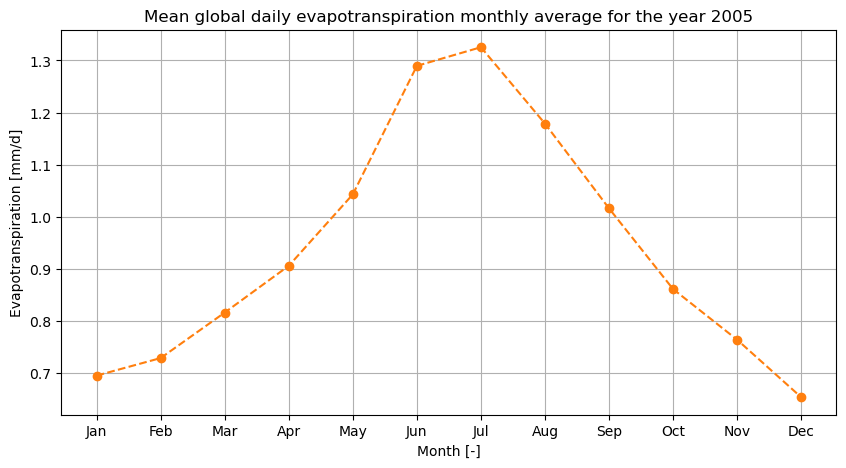

In [5]:
"""Plotting mean"""

Months = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec']
t = 144
m_py = 12

DOLCE_v2_1_monthly_2005 = np.zeros(m_py)

for i in range(m_py):
    DOLCE_v2_1_monthly_2005[i] = DOLCE_v2_1_monthly_weighted_Ant[: , t - 8 * m_py + i  , :].mean()

plt.figure(figsize = ( 10, 5))
plt.title('Mean global daily evapotranspiration monthly average for the year 2005')
plt.plot(np.arange(0 , 12 , 1) , DOLCE_v2_1_monthly_2005 , 'C1o--')
plt.grid()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]')
plt.xticks(np.arange(0 , 12 , 1) , Months);

print(f'The standard deviation of the 2005 monthly average is: {np.std(DOLCE_v2_1_monthly_2005):.3f} mm/d')
print()

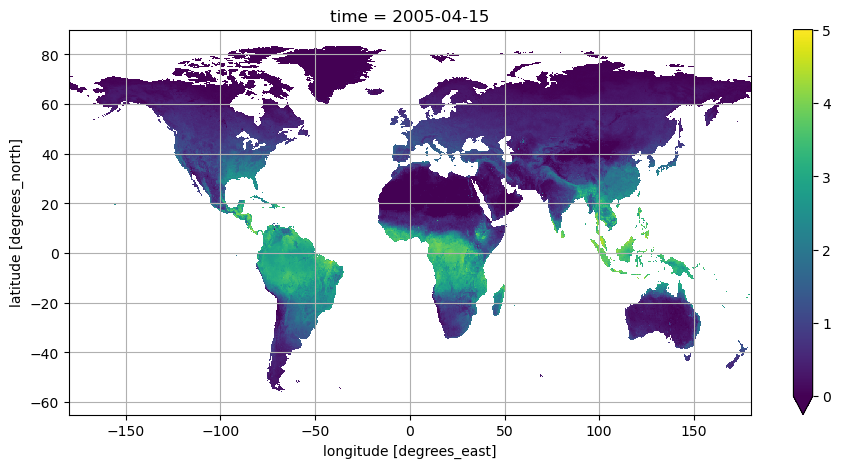

In [6]:
"""plotting map"""

plt.figure(figsize = (11, 5))

DOLCE_v2_1_monthly_weighted_Ant[: , t - 8 * m_py + 3 , :].plot(cmap = 'viridis' , vmin = 0 , vmax = 5)
plt.ylim(-65 , 90)
plt.grid()

The standard deviation of the 2005 monthly average is: 0.414 mm/d



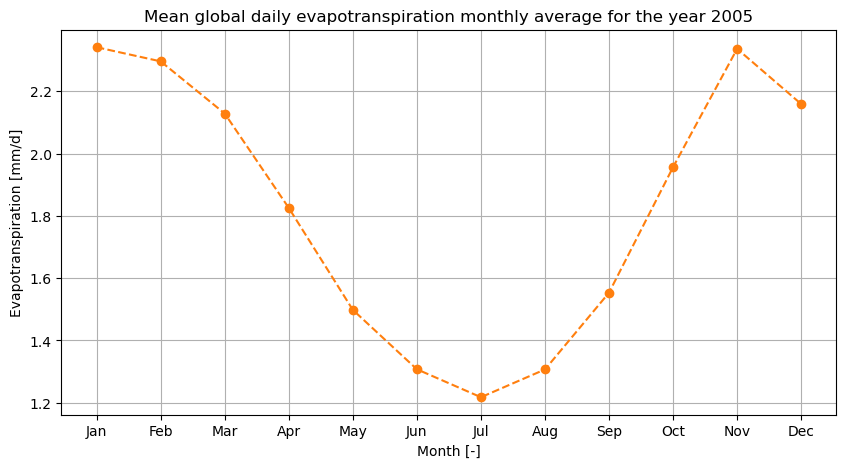

In [7]:
"""Plotting mean (-60 until 0 degrees latitude)"""

Months = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec']
t = 144
m_py = 12

DOLCE_v2_1_monthly_2005 = np.zeros(m_py)

for i in range(m_py):
    DOLCE_v2_1_monthly_2005[i] = DOLCE_v2_1_monthly_weighted_SH[: , t - 8 * m_py + i  , :].mean()

plt.figure(figsize = ( 10, 5))
plt.title('Mean global daily evapotranspiration monthly average for the year 2005')
plt.plot(np.arange(0 , 12 , 1) , DOLCE_v2_1_monthly_2005 , 'C1o--')
plt.grid()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]')
plt.xticks(np.arange(0 , 12 , 1) , Months)

print(f'The standard deviation of the 2005 monthly average is: {np.std(DOLCE_v2_1_monthly_2005):.3f} mm/d')
print();


[0.70652372 0.74647242 0.83025808 0.93341877 1.05054592 1.28757229
 1.31680468 1.1890529  1.02651581 0.86667193 0.77380596 0.68981098]

The standard deviation of the timeseries 2003-2009 monthly average is: 0.213 mm/d



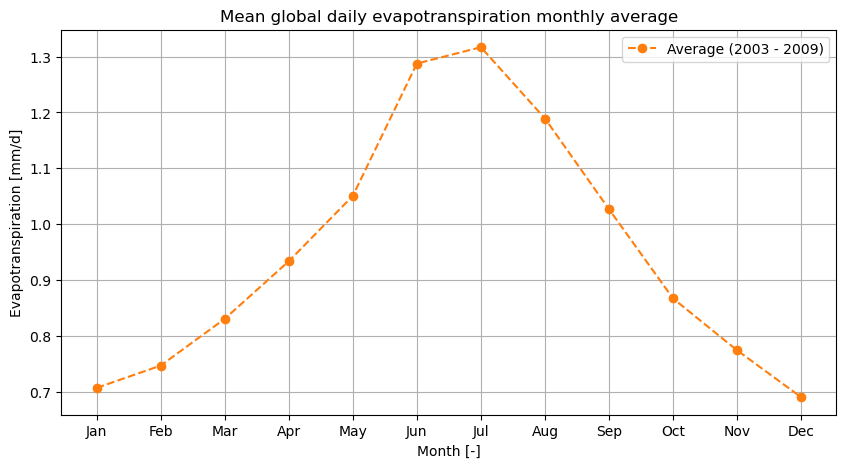

In [8]:
"""For 2003-2009"""

DOLCE_v2_1_monthly_mean = np.zeros(12)
Monthly_mean_all = np.zeros(84)
number_m = np.arange(0 , 12 , 1)

for i in range(len(Monthly_mean_all)):
    Monthly_mean_all[i] = DOLCE_v2_1_monthly_weighted_Ant[: , i + 2 * 12 , :].mean()

for i in number_m:
    DOLCE_v2_1_monthly_mean[i] = np.mean([Monthly_mean_all[i] , Monthly_mean_all[i + 12] , Monthly_mean_all[i + 24] ,  Monthly_mean_all[i+36] , 
    Monthly_mean_all[i + 48] , Monthly_mean_all[i + 60] , Monthly_mean_all[i + 72]])
    
plt.figure(figsize = ( 10, 5))
plt.title('Mean global daily evapotranspiration monthly average')
plt.plot(np.arange(0 , 12 , 1) , DOLCE_v2_1_monthly_mean , 'C1o--' , label = 'Average (2003 - 2009)')
plt.grid()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]')
plt.xticks(np.arange(0 , 12 , 1) , Months)
plt.legend()

print()
print(DOLCE_v2_1_monthly_mean)
print()
print(f'The standard deviation of the timeseries 2003-2009 monthly average is: {np.std(Monthly_mean_all):.3f} mm/d')
print()


[2.38669904 2.3868367  2.24367346 1.92208362 1.56190456 1.33870492
 1.23266805 1.33868133 1.59115068 1.9676872  2.35705288 2.25704207]

The standard deviation of the timeseries 2003-2009 monthly average is: 0.414 mm/d



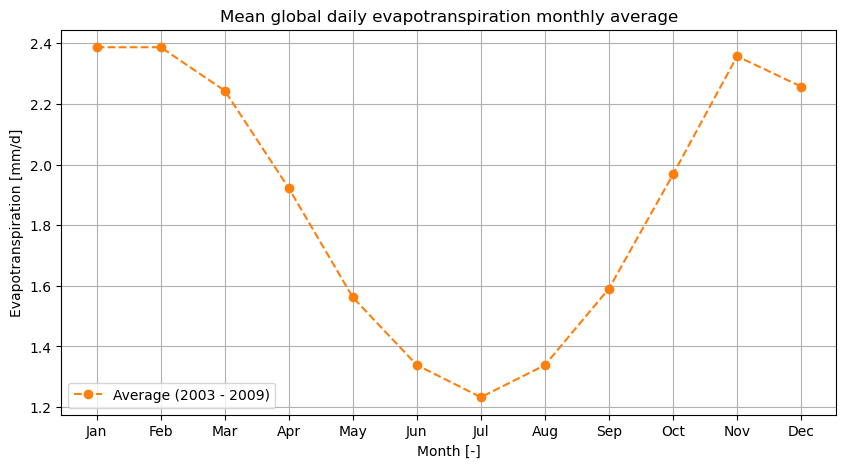

In [9]:
"""For 2003-2009 (Between -60 and 0 degrees latitude)"""

DOLCE_v2_1_monthly_mean = np.zeros(12)
Monthly_mean_all = np.zeros(84)
number_m = np.arange(0 , 12 , 1)

for i in range(len(Monthly_mean_all)):
    Monthly_mean_all[i] = DOLCE_v2_1_monthly_weighted_SH[: , i + 2 * 12 , :].mean()

for i in number_m:
    DOLCE_v2_1_monthly_mean[i] = np.mean([Monthly_mean_all[i] , Monthly_mean_all[i + 12] , Monthly_mean_all[i + 24] ,  Monthly_mean_all[i+36] , 
    Monthly_mean_all[i + 48] , Monthly_mean_all[i + 60] , Monthly_mean_all[i + 72]])
    
plt.figure(figsize = ( 10, 5))
plt.title('Mean global daily evapotranspiration monthly average')
plt.plot(np.arange(0 , 12 , 1) , DOLCE_v2_1_monthly_mean , 'C1o--' , label = 'Average (2003 - 2009)')
plt.grid()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]')
plt.xticks(np.arange(0 , 12 , 1) , Months)
plt.legend()

print()
print(DOLCE_v2_1_monthly_mean)
print()
print(f'The standard deviation of the timeseries 2003-2009 monthly average is: {np.std(DOLCE_v2_1_monthly_2005):.3f} mm/d')
print()


[0.70819159 0.75005787 0.83842034 0.93954201 1.05791243 1.28523161
 1.31291568 1.18362507 1.01860033 0.86451922 0.77029181 0.69252451]

The standard deviation of the timeseries 2001-2012 monthly average is: 0.213 mm/d



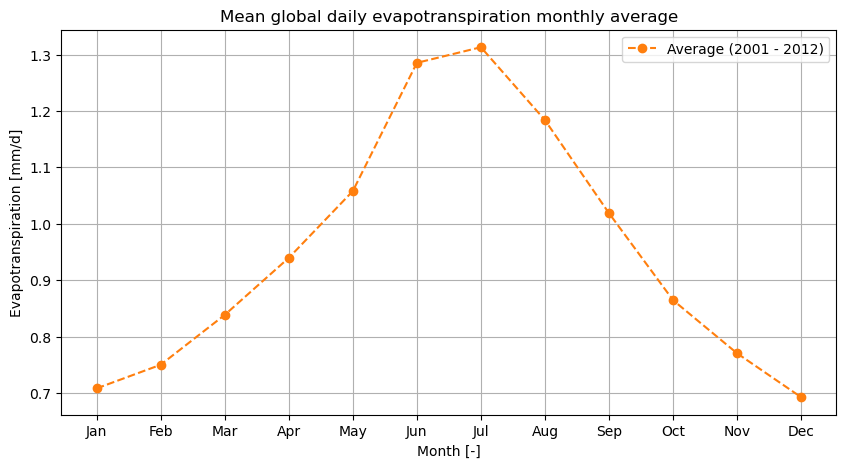

In [10]:
"""For 2001-2012"""

DOLCE_v2_1_monthly_mean = np.zeros(12)
Monthly_mean_all = np.zeros(144)
number_m = np.arange(0 , 12 , 1)

for i in range(len(Monthly_mean_all)):
    Monthly_mean_all[i] = DOLCE_v2_1_monthly_weighted_Ant[: , i , :].mean()

for i in number_m:
    DOLCE_v2_1_monthly_mean[i] = np.mean([Monthly_mean_all[i] , Monthly_mean_all[i + 12] , Monthly_mean_all[i + 24] ,  Monthly_mean_all[i+36] , 
    Monthly_mean_all[i + 48] , Monthly_mean_all[i + 60] , Monthly_mean_all[i + 72] , Monthly_mean_all[i + 84] , 
    Monthly_mean_all[i + 96] , Monthly_mean_all[i + 108] , Monthly_mean_all[i + 120] , Monthly_mean_all[i + 132]])
    
plt.figure(figsize = ( 10, 5))
plt.title('Mean global daily evapotranspiration monthly average')
plt.plot(np.arange(0 , 12 , 1) , DOLCE_v2_1_monthly_mean , 'C1o--' , label = 'Average (2001 - 2012)')
plt.grid()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]')
plt.xticks(np.arange(0 , 12 , 1) , Months)
plt.legend()

print()
print(DOLCE_v2_1_monthly_mean)
print()
print(f'The standard deviation of the timeseries 2001-2012 monthly average is: {np.std(Monthly_mean_all):.3f} mm/d')
print()


[2.40863401 2.41062304 2.28985032 1.95282426 1.58033879 1.34246251
 1.23532785 1.33952376 1.59082959 1.97870912 2.3659347  2.28002231]

The standard deviation of the timeseries 2001-2012 monthly average is: 0.449 mm/d



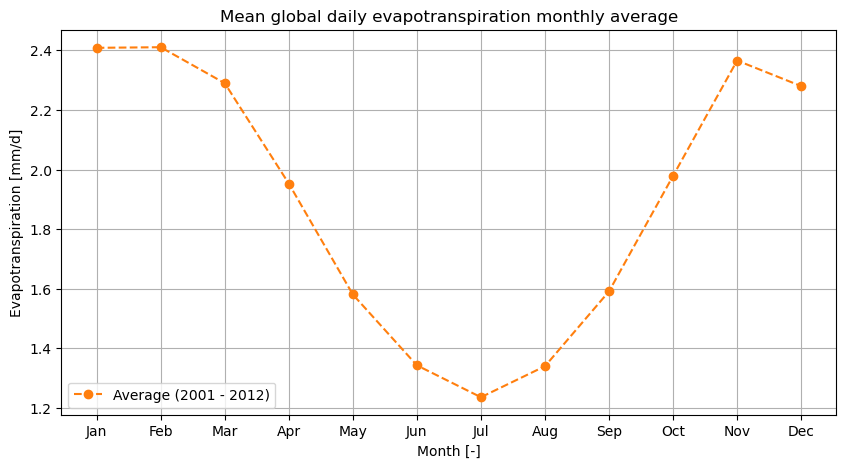

In [11]:
"""For 2001-2012"""

DOLCE_v2_1_monthly_mean = np.zeros(12)
Monthly_mean_all = np.zeros(144)
number_m = np.arange(0 , 12 , 1)

for i in range(len(Monthly_mean_all)):
    Monthly_mean_all[i] = DOLCE_v2_1_monthly_weighted_SH[: , i , :].mean()

for i in number_m:
    DOLCE_v2_1_monthly_mean[i] = np.mean([Monthly_mean_all[i] , Monthly_mean_all[i + 12] , Monthly_mean_all[i + 24] ,  Monthly_mean_all[i+36] , 
    Monthly_mean_all[i + 48] , Monthly_mean_all[i + 60] , Monthly_mean_all[i + 72] , Monthly_mean_all[i + 84] , 
    Monthly_mean_all[i + 96] , Monthly_mean_all[i + 108] , Monthly_mean_all[i + 120] , Monthly_mean_all[i + 132]])
    
plt.figure(figsize = ( 10, 5))
plt.title('Mean global daily evapotranspiration monthly average')
plt.plot(np.arange(0 , 12 , 1) , DOLCE_v2_1_monthly_mean , 'C1o--' , label = 'Average (2001 - 2012)')
plt.grid()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]')
plt.xticks(np.arange(0 , 12 , 1) , Months)
plt.legend()

print()
print(DOLCE_v2_1_monthly_mean)
print()
print(f'The standard deviation of the timeseries 2001-2012 monthly average is: {np.std(Monthly_mean_all):.3f} mm/d')
print()